在数据准备阶段，我们从`sklearn.datasets`中使用`fetch_20newsgroups_vectorized()`函数加载了一个经典的数据集:20 Newsgroups 数据集。

这个数据集常用于文本分类、自然语言处理（NLP）和机器学习任务。

## 20 Newsgroups 数据集介绍（向量化版）

###  一、什么是 20 Newsgroups 数据集？

- **20 Newsgroups** 是一个包含大约 20,000 篇 Usenet 新闻组文档的数据集。
- 每个文档属于 20 个不同主题之一。
- 常用于文本分类和自然语言处理任务。

###  二、函数 `fetch_20newsgroups_vectorized()` 的作用

这是 Scikit-learn 提供的一个便捷函数，用于直接加载已经**向量化（vectorized）**好的数据：

- `fetch_20newsgroups()`：加载原始文本数据（字符串形式）
- `fetch_20newsgroups_vectorized()`：加载的是已经转换为数值特征向量的形式（如 TF-IDF）

> 这样可以直接用于训练模型，无需手动进行文本向量化。

---

###  三、代码解析

```python
train_data = fetch_20newsgroups_vectorized(subset='train',  #加载训练集（也可以是'test'或'all'）
                                           normalize=False, #是否对特征向量进行归一化（默认不归一化）
                                           data_home='20newsgroups') #下载或缓存数据的本地路径
```

### 四、返回对象结构（train_data / test_data）
   - .data 特征矩阵（numpy 数组或稀疏矩阵），每一行代表一篇文章的向量化表示 
   - .target 标签数组，每个元素是一个整数，表示文章所属的类别（0~19）
   - .target_names 类别名称列表，对应.target的索引
   - .DESCR 数据集描述信息（可用于查看详细说明）
   - train_data.feature_names 每个列索引对应的原始词



In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups_vectorized
from tqdm import trange

#normalize 表示是否对数据归一化，这里我们保留原始数据
#data_home 表示数据存放的路径

train_data=fetch_20newsgroups_vectorized(subset='train',
                                         normalize=False,
                                         data_home='20newsgroups')
test_data=fetch_20newsgroups_vectorized(subset='test',
                                        normalize=False,
                                        data_home='20newsgroups')

print('文章主题:','\n'.join(train_data.target_names))

print(train_data.data[0]) 

# 介绍一下这个打印的数据集的含义
# (0, 56979)	4  第 0 个文档（即第一个新闻文章）,在第 56979 个特征维度上（即词汇表中的第 56979 个词）,出现了 4 次（或其对应的 TF-IDF 值为 4）

文章主题: alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
  (0, 56979)	4
  (0, 106171)	2
  (0, 129935)	2
  (0, 119977)	2
  (0, 106184)	3
  (0, 29279)	3
  (0, 111322)	1
  (0, 29403)	3
  (0, 123796)	6
  (0, 27618)	1
  (0, 92203)	2
  (0, 66608)	16
  (0, 86247)	6
  (0, 95392)	2
  (0, 101034)	1
  (0, 115475)	10
  (0, 47982)	1
  (0, 125053)	3
  (0, 76032)	1
  (0, 20228)	1
  (0, 29573)	1
  (0, 36979)	1
  (0, 40042)	1
  (0, 33764)	1
  (0, 43740)	2
  :	:
  (0, 83940)	1
  (0, 92260)	1
  (0, 81998)	1
  (0, 106239)	1
  (0, 123430)	1
  (0, 52449)	1
  (0, 117029)	1
  (0, 114520)	1
  (0, 96088)	1
  (0, 125017)	1
  (0, 53572)	1
  (0, 89503)	1
  (0, 28948)	1
  (0, 6214)	1
  (0, 109025)	1
  (0, 29400)	1
  (0, 115508)	1
  (0, 76

In [3]:
# 统计新闻主题频率
cat_cnt = np.bincount(train_data.target)
print('新闻数量：', cat_cnt)
log_cat_freq = np.log(cat_cnt / np.sum(cat_cnt)) #用np.log(...)是为了防止多个小概率相乘导致下溢，使用加法代替乘法。

# 对每个主题统计单词频率
alpha = 1.0


log_voc_freq = np.zeros((20, len(train_data.feature_names))) + alpha  
#log_voc_freq表示每个主题下每个词的累计频率。
#20是主题个数 train_data.feature_names是分割出的单词
# 加上 alpha 和 len(...) * alpha就是为了防止除以零，并让未出现的词也有一个小概率,出现过的词频率页不会被影响太大。 
# 这种做法称为拉普拉斯平滑（Laplace Smoothing）


voc_cnt = np.zeros((20, 1)) + len(train_data.feature_names) * alpha 
#表示每个主题下所有词的总词频（加上平滑项）。
#假设每个主题已经“虚拟地”包含了所有词各一次。


# 用nonzero返回稀疏矩阵不为零的行列坐标
rows, cols = train_data.data.nonzero()
#data是一个一个稀疏矩阵，形状为 (n_samples, n_features)
#矩阵中的值通常是词频（Count）或 TF-IDF 值

for i in trange(len(rows)):
    news = rows[i]
    voc = cols[i]
    cat = train_data.target[news]  #新闻类别
    log_voc_freq[cat, voc] += train_data.data[news, voc]
    voc_cnt[cat] += train_data.data[news, voc]

log_voc_freq = np.log(log_voc_freq / voc_cnt)

新闻数量： [480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]


100%|██████████| 1787565/1787565 [00:42<00:00, 41973.59it/s]


### 关于先验，似然，后验
- 先验 P(topic)    log_cat_freq   每个主题在训练集中出现的频率（取对数）
- 似然 P(word∣topic)  log_voc_freq[:, voc] 每个词在各个主题下的条件概率（取对数）
- 后验 P(topic∣document)  log_post 综合考虑先验和所有词的似然后，该文档属于各主题的概率（取对数）

举个通俗的例子：疾病检测
 - 先验概率 P(患病) ： 人群中这种病的发病率，比如 1%。
 - 似然 P(阳性∣患病) ：如果真的患病，检测出阳性的概率（比如是 95%）
 - 后验概率 P(患病∣阳性) ：这才是你关心的 —— 看到阳性结果后，你真正患病的概率

可以把它们想象成：
 
 - 先验（Prior）  医生说“这个病的发病率只有 1%”，这是他还没给你做检查时就知道的。
 - 似然（Likelihood） 检查结果显示你是阳性，这是根据你的身体数据得出的。
 - 后验（Posterior） 综合这两条信息，医生告诉你：“你实际得病的可能性大约是 16%。”

In [4]:
def test_news(news):
    rows, cols = news.nonzero()
    # 对数后验
    log_post = np.copy(log_cat_freq)
    for row, voc in zip(rows, cols):
        # 加上每个单词在类别下的后验
        log_post += log_voc_freq[:, voc]
    return np.argmax(log_post)

#先加上先验的目的： 当似然都相同的时候，那么不就是先验的概率高的更有可能吗



In [5]:
preds = []
for news in test_data.data:
    preds.append(test_news(news))
acc = np.mean(np.array(preds) == test_data.target)
print('分类准确率：', acc)

分类准确率： 0.7823951141795008


#### 调用Sklearn的库

In [6]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=alpha)
mnb.fit(train_data.data, train_data.target)
print('分类准确率：', mnb.score(test_data.data, test_data.target))

分类准确率： 0.7728359001593202


In [11]:
import matplotlib.image as mping
import matplotlib.pyplot as plt

#读取原图 
orig_img=np.array(mping.imread('origimg.jpg'),dtype=int)
orig_img[orig_img<128]=-1  #黑色设为-1
orig_img[orig_img>=120]=1  #白色设为1

#读取带噪图像
noisy_img=np.array(mping.imread('noisyimg.jpg'),dtype=int)
noisy_img[noisy_img<128]=-1
noisy_img[noisy_img>=128]=1


In [18]:
def compute_noise_rate(noisy,orig):
    err=np.sum(noisy!=orig)
    return err/orig.size

init_noise_rate=compute_noise_rate(noisy_img,orig_img)
print (f'带噪图像与原图不一致的像素比例：{init_noise_rate * 100:.4f}%')

带噪图像与原图不一致的像素比例：9.9386%


In [ ]:
#计算坐标(i,j)处的局部能量
def compute_energy(X,Y,i,j,alpha,beta):
    #X 当前图像
    #Y 带噪图像

    #这里面不能用origin相比，因为origin是不可见的，他是用来验证的
    #Y[i][j]是你看到的现状（有错的）
    #X[i][j] 是你猜测的“真实”值
    #如果你猜的值和现状一样 → 很可能没改错，代价低
    energy=-beta*X[i][j]*Y[i][j]  
    # 判断坐标是否超出边界
    if i > 0:
        energy -= alpha * X[i][j] * X[i - 1][j]
    if i < X.shape[0] - 1:
        energy -= alpha * X[i][j] * X[i + 1][j]
    if j > 0:
        energy -= alpha * X[i][j] * X[i][j - 1]
    if j < X.shape[1] - 1:
        energy -= alpha * X[i][j] * X[i][j + 1]
    return energy

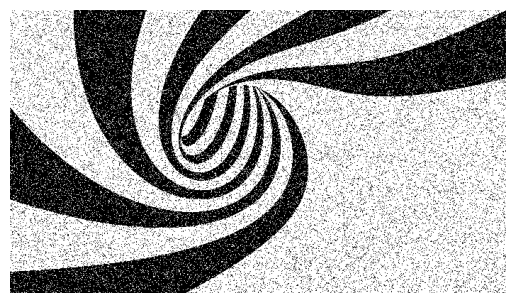

迭代轮数：0，噪声率：9.9386%


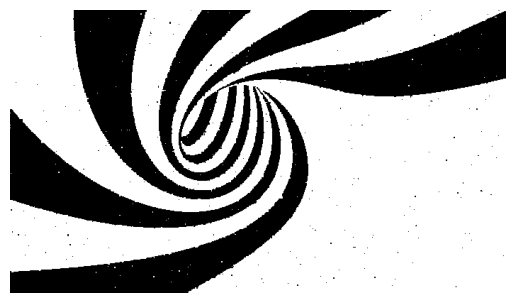

迭代轮数：1，噪声率：0.5632%


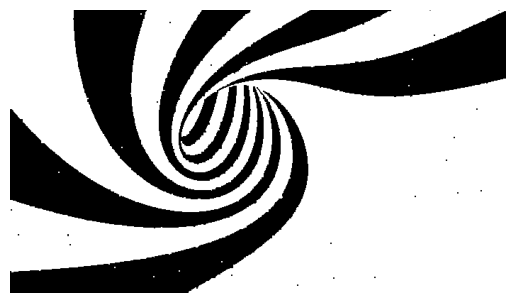

迭代轮数：2，噪声率：0.4071%


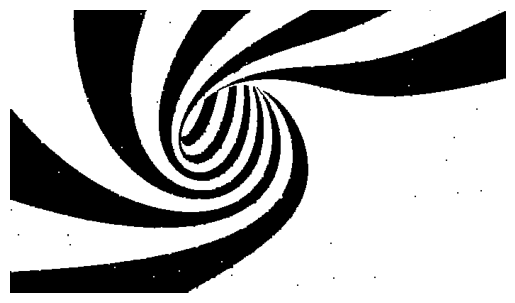

迭代轮数：3，噪声率：0.3993%


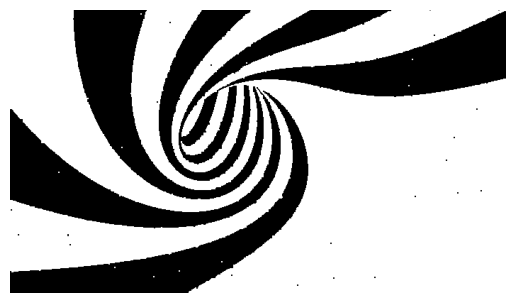

迭代轮数：4，噪声率：0.3979%


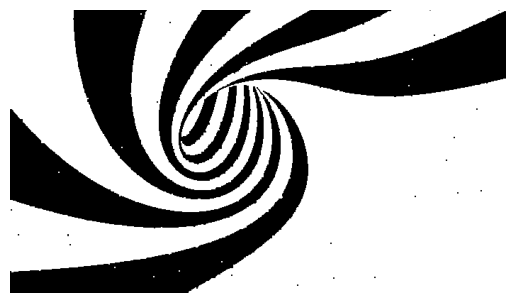

迭代轮数：5，噪声率：0.3975%


In [30]:
#超参数
alpha=2.1
beta=1.0
max_iter=5

plt.figure()
plt.axis('off')
plt.imshow(noisy_img,cmap='binary_r')
plt.show()
noisy_rate=compute_noise_rate(noisy_img,orig_img)*100
print(f'迭代轮数：{0}，噪声率：{noisy_rate:.4f}%')

#逐像素优化
X=np.copy(noisy_img)
for k in range(max_iter):
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            # 当前像素取1和-1的能量
            X[i,j]=1
            pos_energy=compute_energy(X,noisy_img,i,j,alpha,beta)
            X[i,j]=-1
            neg_energy=compute_energy(X,noisy_img,i,j,alpha,beta)
            #设为能量最低的值
            X[i,j]=1 if pos_energy<neg_energy else -1
    
    plt.figure()
    plt.axis('off')
    plt.imshow(X,cmap='binary_r')
    plt.show()
    noisy_rate=compute_noise_rate(X,orig_img)*100
    print(f'迭代轮数：{k+1}，噪声率：{noisy_rate:.4f}%')